In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as colors
import cartopy.crs as ccrs
import numpy as np
from cartopy.mpl.geoaxes import GeoAxes
from mpl_toolkits.axes_grid1 import AxesGrid
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.ticker as mticker

In [2]:
year = "2011"
path = "/data/keeling/a/zzheng25/d/mam4_paper_data/chi_only/comp_analysis/"\
        +str(year)+"_"+"year_comp.nc"

var_ls = ["bc_a1","bc_a4","ncl_a1","ncl_a2",
          "pom_a1","pom_a4","soa_a1","soa_a2",
          "dst_a1","dst_a2","so4_a1","so4_a2"]

In [3]:
ds = xr.open_dataset(path)
ds=ds.assign_coords(lon=(((ds.lon + 180) % 360) - 180))
ds=ds.reindex(lon=sorted(ds.lon))
ds=ds.rename_dims({'lon': 'longitude','lat': 'latitude'}).rename({'lon': 'longitude','lat': 'latitude'})

In [4]:
for var in var_ls:
    display(ds[var+"_per"].to_dataframe().describe().transpose())

,count,mean,std,min,25%,50%,75%,max
bc_a1_per,55296.0,1.149619,1.352982,0.007378,0.245432,0.592553,1.549414,10.839958


,count,mean,std,min,25%,50%,75%,max
bc_a4_per,55296.0,1.364703,2.027899,0.000201,0.076992,0.470657,1.721613,9.799842


,count,mean,std,min,25%,50%,75%,max
ncl_a1_per,55296.0,38.718112,31.757719,0.021618,6.103973,32.121975,70.392371,92.23288


,count,mean,std,min,25%,50%,75%,max
ncl_a2_per,55296.0,0.253881,0.347773,0.000002,0.019839,0.12053,0.324712,1.756336


,count,mean,std,min,25%,50%,75%,max
pom_a1_per,55296.0,6.1509,6.408675,0.045658,1.48946,3.746122,8.972424,35.888597


,count,mean,std,min,25%,50%,75%,max
pom_a4_per,55296.0,8.715181,14.977439,0.001188,0.34873,1.823243,9.587898,70.519511


,count,mean,std,min,25%,50%,75%,max
soa_a1_per,55296.0,11.403057,17.414111,0.014864,0.740312,3.258207,14.529842,97.007452


,count,mean,std,min,25%,50%,75%,max
soa_a2_per,55296.0,0.053864,0.122417,1.137331e-07,0.001876,0.009006,0.058569,3.024905


,count,mean,std,min,25%,50%,75%,max
dst_a1_per,55296.0,5.56083,12.095897,0.008469,0.47901,1.371328,3.43286,95.780803


,count,mean,std,min,25%,50%,75%,max
dst_a2_per,55296.0,0.002579,0.008389,1.014777e-08,0.000092,0.000265,0.001371,0.115863


,count,mean,std,min,25%,50%,75%,max
so4_a1_per,55296.0,24.087534,14.109724,0.868851,13.607209,21.655939,30.820444,82.175417


,count,mean,std,min,25%,50%,75%,max
so4_a2_per,55296.0,2.53974,5.548602,0.000674,0.250809,0.476058,0.966475,25.2732


/data/keeling/a/zzheng25/miniconda3/envs/partmc/lib/python3.6/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/data/keeling/a/zzheng25/miniconda3/envs/partmc/lib/python3.6/site-packages/ipykernel_launcher.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


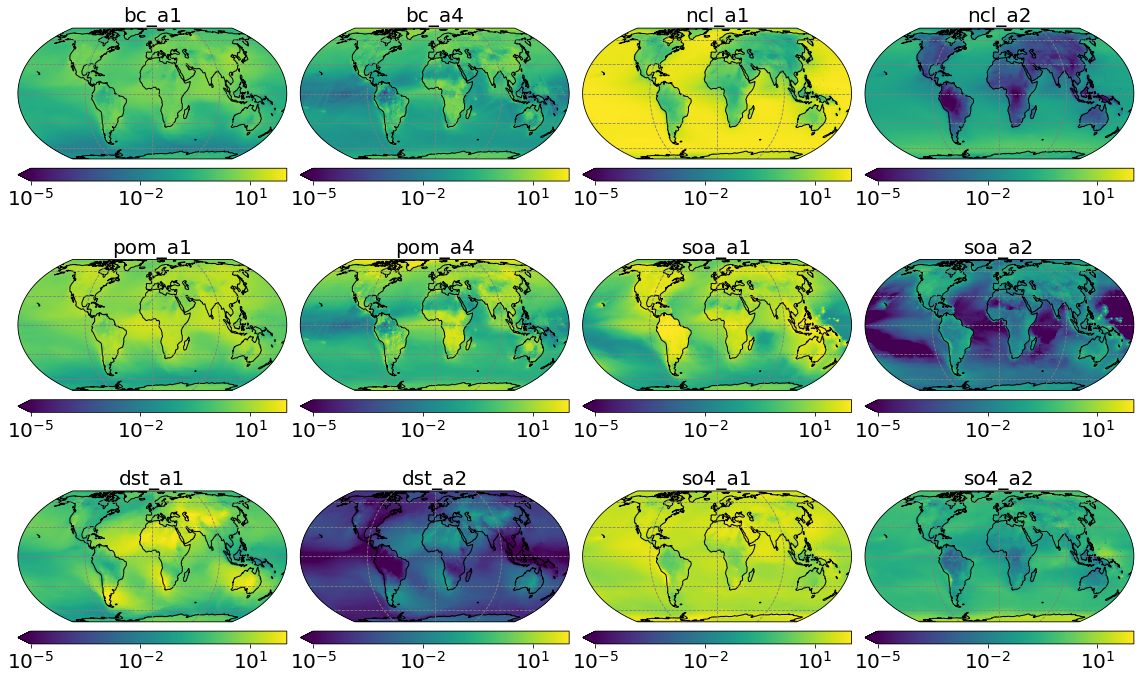

CPU times: user 1min 49s, sys: 5.22 s, total: 1min 54s
Wall time: 1min 48s


In [5]:
%%time
lons=np.asarray(ds.longitude)
lats=np.asarray(ds.latitude)
xx, yy = np.meshgrid(lons, lats)

rc={'axes.labelsize':20, 'font.size':20, 'legend.fontsize':20, 'axes.titlesize':20}
plt.rcParams.update(**rc)

crs = ccrs.EqualEarth()

fig = plt.figure(figsize=(20, 10))
spec2 = matplotlib.gridspec.GridSpec(ncols=4, nrows=3, figure=fig,
                                     wspace=.05, hspace=.25,
                                     bottom=.05, top=.95)
axes = []
f0 = fig.add_subplot(spec2[0, 0],projection=ccrs.EqualEarth())
f1 = fig.add_subplot(spec2[0, 1],projection=ccrs.EqualEarth())
f2 = fig.add_subplot(spec2[0, 2],projection=ccrs.EqualEarth())
f3 = fig.add_subplot(spec2[0, 3],projection=ccrs.EqualEarth())
axes.append([f0,f1,f2,f3])

f0 = fig.add_subplot(spec2[1, 0],projection=ccrs.EqualEarth())
f1 = fig.add_subplot(spec2[1, 1],projection=ccrs.EqualEarth())
f2 = fig.add_subplot(spec2[1, 2],projection=ccrs.EqualEarth())
f3 = fig.add_subplot(spec2[1, 3],projection=ccrs.EqualEarth())
axes.append([f0,f1,f2,f3])

f0 = fig.add_subplot(spec2[2, 0],projection=ccrs.EqualEarth())
f1 = fig.add_subplot(spec2[2, 1],projection=ccrs.EqualEarth())
f2 = fig.add_subplot(spec2[2, 2],projection=ccrs.EqualEarth())
f3 = fig.add_subplot(spec2[2, 3],projection=ccrs.EqualEarth())
axes.append([f0,f1,f2,f3])


for i in range(12):
    ax = plt.subplot(spec2[i],projection=crs)
    
    ax.coastlines()
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    #ax.set_title("("+char_list[i]+")")
    ax.set_title(var_ls[i])

    zz = ds[var_ls[i]+"_per"]
    p = ax.pcolormesh(xx, yy, zz,
                      norm=colors.LogNorm(vmin=0.00001, vmax=100),
                      rasterized=True,
                      transform=ccrs.PlateCarree())
                      #cmap='RdBu')
    gl=ax.gridlines(color='grey', linestyle='--', draw_labels=False)
    gl.xlocator = mticker.FixedLocator([-90, 0, 90])
    
    cb = plt.colorbar(p,orientation='horizontal',
                      fraction=0.07,pad=0.05,extend='min')
    cb.solids.set_rasterized(True)


plt.tight_layout()
plt.savefig('../figures/species_dist_per.pdf',dpi=188)

plt.show()